# 準備

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

#プロット用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

# 数学的な基礎

ロジスティック関数は、−∞から∞までの値を入力として受け取って、常に0から1の間の値を返す<br>
→２つのグループに分けるときに有用

##### ロジスティック関数のグラフ化

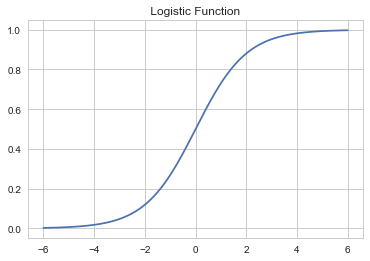

In [3]:
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

t = np.linspace(-6,6,500) #x軸の範囲

y = np.array([logistic(ele) for ele in t]) #y

plt.plot(t,y)
plt.title(' Logistic Function ')

$$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$
このロジスティック関数のβ0 やβ1を推定する

# データの準備

In [5]:
#不倫調査のデータを利用する
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
#不倫の有無を0か1で表現する
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
df['Had_Affair'] = df['affairs'].apply(affair_check)
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [7]:
# 不倫の有無でグループ分け
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


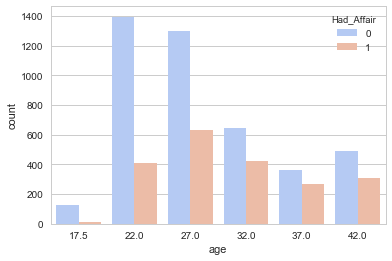

In [9]:
# 年齢分布を確認。
sns.countplot('age',data=df.sort_values('age')
              ,hue='Had_Affair',palette='coolwarm')

↑年齢が上がると不倫率が上がる傾向

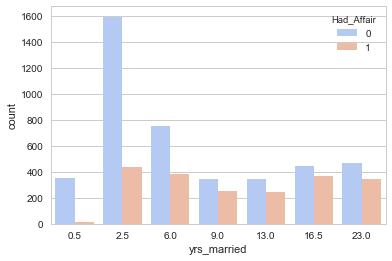

In [10]:
sns.countplot('yrs_married'
              ,data=df.sort_values('yrs_married')
              ,hue='Had_Affair',palette='coolwarm')

↑結婚から年月が経つと、不倫率が上がる

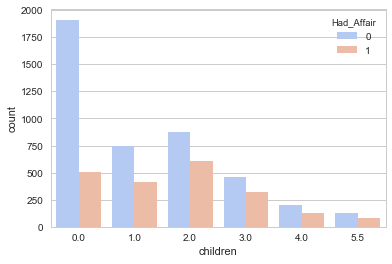

In [12]:
sns.countplot('children'
              ,data=df.sort_values('children')
              ,hue='Had_Affair',palette='coolwarm')

↑子供の数が少ないと、不倫率が低い

# データの前処理

Occupation と Husband's Occupation です。 これは、それぞれ奥さんとご主人の職業ですが、カテゴリー型のデータになっているので、数字の大小に意味がない<br>
→ダミー変数を導入して、その変数の0/1で表現し直す

In [13]:
# カテゴリーを表現する変数を、ダミー変数に展開します。
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [14]:
#わかりやすいように列名を付ける
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [15]:
# 不要になったoccupationの列と、目的変数「Had_Affair」を削除
X = df.drop(['occupation','occupation_husb'
             ,'Had_Affair'],axis=1)

In [16]:
# ダミー変数のDataFrameを繋げる
dummies = pd.concat([occ_dummies
                     ,hus_occ_dummies],axis=1)

In [17]:
# データを結合し完成
X = pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [18]:
# 目的変数を作成
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

# 多重共線性

ダミー変数同士は高度に相関する可能性がある<br>
（例えばmaleが1ならfemaleは必ず0）<br>
今回は、occ1とhocc1を削除、affairs列も目的変数の元になっている変数なので削除

In [19]:
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
X = X.drop('affairs',axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [20]:
#Yを1次元arrayにする
Y = Y.values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# ScikitLearnを使ったロジスティック回帰
→線形回帰と似ている

In [21]:
log_model = LogisticRegression() #インスタンス作成
log_model.fit(X,Y)
log_model.score(X,Y) #モデルの精度を確認

0.72588752748978946

↑７２％の精度

In [22]:
# 変数名と係数を確認
coeff_df = DataFrame([X.columns
                      , log_model.coef_[0]]).T
coeff_df

,0,1
0,rate_marriage,-0.697993
1,age,-0.0563827
2,yrs_married,0.103917
3,children,0.01818
4,religious,-0.368666
5,educ,0.00863221
6,occ2,0.300738
7,occ3,0.611147
8,occ4,0.349675
9,occ5,0.945794


↑裕福であれば不倫は減る（0番目の係数）

# 学習とテスト

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
log_model2 = LogisticRegression() #新しいモデル
log_model2.fit(X_train, Y_train) #学習用データで学習

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# テスト用データで予測
class_predict = log_model2.predict(X_test)
class_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# 精度を計算
print(metrics.accuracy_score(Y_test,class_predict))

0.715452261307


↑全てのデータを使ったときとほぼ同じ